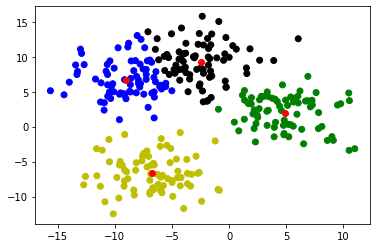


Tạo độ 4 centroid là
[[-9.04009664  6.72816975]
 [ 4.92875922  2.00168953]
 [-6.71704142 -6.66593905]
 [-2.49456823  9.28322108]]


KMeans(n_clusters=4, random_state=0)

In [5]:
# Bài 1:Tạo 300 điểm dữ liệu với 4 phân cụm, dùng thư viện sklearn để tìm điểm centroid của 4 phân cụng đó và
# vẽ lên trục toạ độ.
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

features, true_labels = make_blobs(n_samples=300,n_features=2,
centers=4,cluster_std=2.75,random_state=42)

kmeans = KMeans(n_clusters=4, random_state=0).fit(features)
color_dict = {0:'b', 1:'g', 2:'y',3:'black'}
colors = [color_dict[i] for i in kmeans.labels_]
plt.scatter(features[:,0],features[:,1], c = colors)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'r')
plt.show()
print("\nTạo độ 4 centroid là")
print(kmeans.cluster_centers_)
kmeans

In [2]:
# Bài 2.0:Viết hàm xác định centroid của 4 phân cụm đó bằng thuật toán. (In toạ độ của các centroid)

# 1. init center points
def getRandomCentroids(dataSet, k):
    return dataSet[np.random.choice(dataSet.shape[0], k, replace=False)]

# 2.  grouping
def getLabels(dataSet, centroids):
    y = np.zeros(dataSet.shape[0])
    for i in range(dataSet.shape[0]):
        d = dataSet[i] - centroids
        d = np.linalg.norm(d, axis=1)
        y[i] = np.argmin(d)
        
    return y

# 3. Update center points
def getCentroids(dataSet, y, k):
    centroids = np.zeros((k, dataSet.shape[1]))
    for i in range(k):
        dataSet_i = dataSet[y==i, :]
        centroids[i] = np.mean(dataSet_i, axis = 0)
    return centroids

# kmeans algorithm
def Function_kmeans(dataSet, k):
    centroids = getRandomCentroids(dataSet, k)
    y = []
    while True:
        # save pre-loop groups
        y_old = y
        # grouping
        y = getLabels(dataSet, centroids)
        # break while loop if groups are not changed
        if np.array_equal(y, y_old):
            break

        #  update centers
        centroids = getCentroids(dataSet, y, k)
    return (centroids, y)

In [3]:
def plot_result(dataSet, y, centroids, k, title):
    color_dict = {0:'b', 1:'g', 2:'y',3:'black'}
    for i in range(k):
        plt.scatter(dataSet[y==i,0],
                    dataSet[y==i,1],
                    s=30,
                    c=color_dict[i],
                    #marker='s',
                    label='cluster '+ str(i+1))
 
    plt.scatter(centroids[:,0],
                    centroids[:,1],
                    s=250,
                    marker='*',
                    c='red',
                    label='centroids')
    plt.title(title)
    plt.legend(); plt.grid(); plt.show()

In [4]:
def caldistance(taphop, centerx):
    import math
    kq=0
    for i in range (taphop.shape[0]):
        lenx=(taphop[i,0]-centerx[0])
        leny=(taphop[i,1]-centerx[1])
        kq+=math.sqrt(lenx**2+leny**2)
    return kq




Lần 1


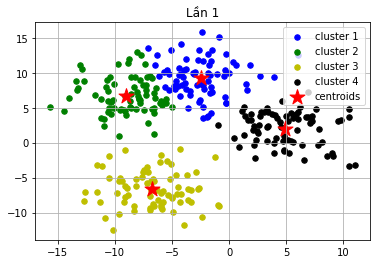

Centroid là :
 [[-2.49456823  9.28322108]
 [-9.04009664  6.72816975]
 [-6.71704142 -6.66593905]
 [ 4.92875922  2.00168953]]
Khoảng cách trung bình của cluster 1 la  3.177392745382186
Khoảng cách trung bình của cluster 2 la  3.0685039593211307
Khoảng cách trung bình của cluster 3 la  3.3499306219240053
Khoảng cách trung bình của cluster 4 la  3.253157000225907



Lần 2


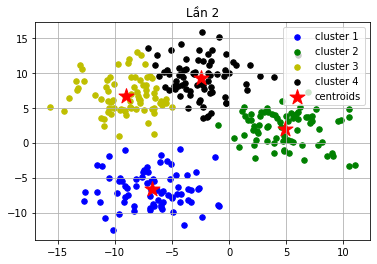

Centroid là :
 [[-6.71704142 -6.66593905]
 [ 4.92875922  2.00168953]
 [-9.04009664  6.72816975]
 [-2.49456823  9.28322108]]
Khoảng cách trung bình của cluster 1 la  3.3499306219240053
Khoảng cách trung bình của cluster 2 la  3.253157000225907
Khoảng cách trung bình của cluster 3 la  3.0685039593211307
Khoảng cách trung bình của cluster 4 la  3.177392745382186



Lần 3


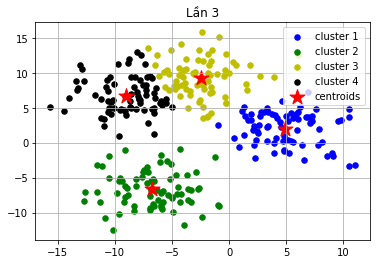

Centroid là :
 [[ 4.92875922  2.00168953]
 [-6.71704142 -6.66593905]
 [-2.49456823  9.28322108]
 [-9.04009664  6.72816975]]
Khoảng cách trung bình của cluster 1 la  3.253157000225907
Khoảng cách trung bình của cluster 2 la  3.3499306219240053
Khoảng cách trung bình của cluster 3 la  3.177392745382186
Khoảng cách trung bình của cluster 4 la  3.0685039593211307


In [5]:
# Bài 2.1:Trong đó yêu cầu phải chạy thử 3 vòng lặp với các centroid được khởi tạo ngẫu nhiên khác nhau
# Bài 2.2:In độ chênh lệch khoảng cách trung bình giữa các cụm.

# Bài 3:Vẽ tất cả các điểm và các centroid đã xác định lên trục toạ độ
kc1=kc2=kc3=np.array([])
# Lần 1
print('\n\n\nLần 1')
centroids_1, y = Function_kmeans(features, 4)
plot_result(features, y, centroids_1, 4, 'Lần 1')
print('Centroid là :\n',centroids_1)
for j in range (4):
    x=caldistance(features[y==j], centroids_1[j])/features[y==j].shape[0]
    kc1=np.append(kc1,x)
    print('Khoảng cách trung bình của cluster',j+1,'la ',x)
# Lần 2
print('\n\n\nLần 2')
centroids_2, y = Function_kmeans(features, 4)
plot_result(features, y, centroids_2, 4, 'Lần 2')
print('Centroid là :\n',centroids_2)
for j in range (4):
    x=caldistance(features[y==j], centroids_2[j])/features[y==j].shape[0]
    kc2=np.append(kc2,x)
    print('Khoảng cách trung bình của cluster',j+1,'la ',x)
# Lần 3
print('\n\n\nLần 3')
centroids_3, y = Function_kmeans(features, 4)
plot_result(features, y, centroids_3, 4, 'Lần 3')
print('Centroid là :\n',centroids_3)
for j in range (4):
    x=caldistance(features[y==j], centroids_3[j])/features[y==j].shape[0]
    kc3=np.append(kc3,x)
    print('Khoảng cách trung bình của cluster',j+1,'la ',x)


Lần phân cụm tốt nhất là :


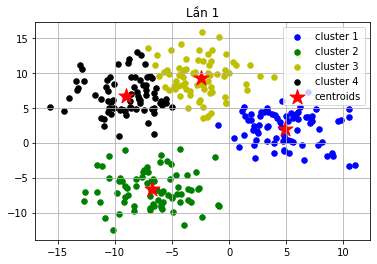

Khoảng cách trung bình của cluster 1 la  3.177392745382186
Khoảng cách trung bình của cluster 2 la  3.0685039593211307
Khoảng cách trung bình của cluster 3 la  3.3499306219240053
Khoảng cách trung bình của cluster 4 la  3.253157000225907
Có sai số trung bình là :  0.3571909174465957


In [6]:
# Bài 2.3:In ra lần phân cụm tốt nhất, số in ra là độ chênh lệch khoảng cách trung giữa các cụm
import math
saiso1=saiso2=saiso3=0
for i in range (len(kc1)):
    saiso1+=abs(kc1.mean()-kc1[i])
    saiso2+=abs(kc2.mean()-kc2[i])
    saiso3+=abs(kc3.mean()-kc3[i])
min_saiso = min(saiso1, saiso2, saiso3)
print('Lần phân cụm tốt nhất là :')
if min_saiso == saiso1:
    plot_result(features, y, centroids_1, 4, 'Lần 1')
    for i in range (4):
        print('Khoảng cách trung bình của cluster',i+1,'la ',kc1[i])
elif min_saiso == saiso2:
    plot_result(features, y, centroids_2, 4, 'Lần 2')
    for i in range (4):
        print('Khoảng cách trung bình của cluster',i+1,'la ',kc2[i])
else:
    plot_result(features, y, centroids_3, 4, 'Lần 3')
    for i in range (4):
        print('Khoảng cách trung bình của cluster',i+1,'la ',kc3[i])
print('Có sai số trung bình là : ',min_saiso)        

In [7]:
# Bài 4:Viết hàm dự đoán nếu có input là 1 điểm dữ liệu thì xác định nó thuộc centroid nào. (In centroid đó ra) 

import math
def distance(x,y):
    distance_1 = math.sqrt(((x - kmeans.cluster_centers_[0][0]) ** 2) + ((y -kmeans.cluster_centers_[0][1]) ** 2))
    distance_2 = math.sqrt(((x - kmeans.cluster_centers_[1][0]) ** 2) + ((y -kmeans.cluster_centers_[1][1]) ** 2))
    distance_3 = math.sqrt(((x - kmeans.cluster_centers_[2][0]) ** 2) + ((y -kmeans.cluster_centers_[2][1]) ** 2))
    distance_4 = math.sqrt(((x - kmeans.cluster_centers_[3][0]) ** 2) + ((y -kmeans.cluster_centers_[3][1]) ** 2))
    min_distance = min(distance_1, distance_2, distance_3, distance_4)
    if min_distance == distance_1:
        print("Thuộc cluster 1")
    elif min_distance == distance_2:
        print("Thuộc cluster 2")
    elif min_distance == distance_3:
        print("Thuộc cluster 3")
    else:
        print("Thuộc cluster 4")

In [8]:
pointx = float(input("Nhập x: "))
pointy = float(input("Nhập y: "))        
distance(pointx,pointy)

Nhập x: -8
Nhập y: 5
Thuộc cluster 1


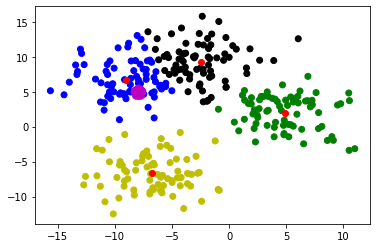

In [9]:
# Bài 5:Vẽ tất cả các điểm bao gồm điểm dữ liệu nhập vào và các centroid lên trục toạ độ. (1 điểm)
input_test = np.array([pointx, pointy]).reshape(-1,2)
plt.scatter(features[:,0],features[:,1], c = colors)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_
[:,1], color = 'r')
plt.scatter(input_test[:,0],input_test[:,1], c = 'm', marker = '*',
linewidths = 10)
plt.show()
